# Assignment-4

This notebook contains the coding questions to test the proficiency in `Object Oriented Programming` in python.

### Date: 10th January, 2026

### Steps to solve and upload the assignment 

- Download the notebook in your local machine.
- Solve the questions in the notebook and save it.
- Rename the file as `Assignment-04-<your_name>_<your_surname>.ipynb`. For example if your name is Dipika Chopra then name the file as `Assignment-04-Dipika_Chopra.ipynb`.
- Upload the solved notebook in your github repo under the folder **Assignment-4**.
- Upload the solved notebook in the google drive location: https://drive.google.com/drive/folders/1G5M6IcgGvx-hrQ2_iq7xp3Vso9tD_dv0?usp=drive_link
<h3><span style="color:red"> Deadline: 31st Jan, 2026 </span></h3>

## Problem-1

Design a system for a library. Include classes for `Book`, `Patron`, and `Library`.

- The `Book` class should have attributes for title, author, ISBN, and a method `is_available()` that returns `True` if the book is not currently checked out and `False` otherwise. It should also have a method `check_out()` that marks the book as checked out and a method `check_in()` that marks it as available.
- The `Patron` class should have attributes for name and patron ID and a method `borrow_book(book)` that associates a book with the patron.
- The `Library` class should have a collection of `Book` objects and `Patron` objects. It should have methods to `add_book(book)`, `add_patron(patron)`, `lend_book(book, patron)`, and `return_book(book)`. The `lend_book` method should only allow a book to be lent if it's available and the patron exists in the library.


Test your implementation.

In [3]:

class Book:
    def __init__(self, title, author, isbn):
        self.title = title
        self.author = author
        self.isbn = isbn
        self._checked_out = False

    def is_available(self):
        return not self._checked_out

    def check_out(self):
        self._checked_out = True

    def check_in(self):
        self._checked_out = False

class Patron:
    def __init__(self, patron_id, name):
        self.patron_id = patron_id
        self.name = name
        self.borrowed_books = []

    def borrow_book(self, book):
        self.borrowed_books.append(book)


class Library:
    def __init__(self):
        self.books = []
        self.patrons = []

    def add_book(self, book):
        self.books.append(book)

    def add_patron(self, patron):
        self.patrons.append(patron)

    def lend_book(self, book, patron):
        if book not in self.books:
            raise Exception("Book does not belong to this library")

        if patron not in self.patrons:
            raise Exception("Patron is not registered in this library")

        if not book.is_available():
            raise Exception("Book is not available")

        book.check_out()
        patron.borrow_book(book)

    def return_book(self, book):
        if book not in self.books:
            raise Exception("Book does not belong to this library")

        book.check_in()


library = Library()

book1 = Book("Bookname", "Author1", "ISBN1")
patron1 = Patron(1, "Akshay")

library.add_book(book1)
library.add_patron(patron1)

library.lend_book(book1, patron1)
print(book1.is_available())

library.return_book(book1)
print(book1.is_available())        
                 

False
True


## Problem-2

Create an base class `Shape` with an method `area()` and another method `perimeter()`. Then, create classes `Rectangle` and `Circle` that inherit from `Shape` and implement the `area()` method. The `perimeter()` method in `Shape` should raise a `NotImplementedError`. Implement the `perimeter()` method in `Rectangle` and `Circle`.

Test your implementation.

In [ ]:
import math

class Shape:
    def area(self):
        raise NotImplementedError("Subclasses must implement this method")

    def perimeter(self):
        raise NotImplementedError("Subclasses must implement this method")

class Rectangle(Shape):
    def __init__(self, width, height):
        self.width = width
        self.height = height

    def area(self):
        return self.width * self.height

    def perimeter(self):
        return 2 * (self.width + self.height)

class Circle(Shape):
    def __init__(self, radius):
        self.radius = radius

    def area(self):
        return math.pi * self.radius ** 2

    def perimeter(self):
        return 2 * math.pi * self.radius



rect = Rectangle(4, 5)
print(f"Rectangle area: {rect.area()}")
print(f"Rectangle perimeter: {rect.perimeter()}")

circle = Circle(3)
print(f"Circle area: {circle.area()}")
print(f"Circle perimeter: {circle.perimeter()}")


Rectangle area: 20
Rectangle perimeter: 18
Circle area: 28.274333882308138
Circle perimeter: 18.84955592153876


## Problem-3

Design a system to model different types of employees in a company. There should be a base `Employee` class with attributes for `name` and `employee_id`. Create two subclasses: `SalariedEmployee` with an attribute for `monthly_salary` and a method `calculate_paycheck()` that returns the monthly salary, and `HourlyEmployee` with attributes for `hourly_rate` and `hours_worked`, and a `calculate_paycheck()` method that returns the total pay for the week. Demonstrate creating instances of both employee types and calling their `calculate_paycheck()` methods.

Test your implementation.

In [9]:
class Employee:
    def __init__(self, name, employee_id):
        self.name = name
        self.employee_id = employee_id

class SalariedEmployee(Employee):
    def __init__(self, name, employee_id, monthly_salary):
        super().__init__(name, employee_id)
        self.monthly_salary = monthly_salary

    def calculate_paycheck(self):
        return self.monthly_salary

class HourlyEmployee(Employee):
    def __init__(self, name, employee_id, hourly_rate, hours_worked):
        super().__init__(name, employee_id)
        self.hourly_rate = hourly_rate
        self.hours_worked = hours_worked

    def calculate_paycheck(self):
        return self.hourly_rate * self.hours_worked


salaried_emp = SalariedEmployee("Akshay", 22, 300000)
print(f"Salaried Employee Paycheck: {salaried_emp.calculate_paycheck()}")

hourly_emp = HourlyEmployee("Rajeev", 23, 1200, 40)
print(f"Hourly Employee Paycheck for one week: {hourly_emp.calculate_paycheck()}")

Salaried Employee Paycheck: 300000
Hourly Employee Paycheck for one week: 48000


## Problem-4

Design a class `polynomial` of one variable which will have attributes `degree`, a positive integer and `coefficients`, a list of floating point numbers. 
`degree` means the highest power of the variable and `coefficients` are the coefficient of individual terms.

A polynomial of degree `n` has `n+1` coefficients. 

- Example-1:
$$ 3x^4 + 5x^3 + x^2 + 9x + 10 $$
This is a polynomial of degree 4 and coefficients are [3, 5, 1, 9, 10].

- Example-2: (some coefficients could be zero)
$$ 0.7x^3 + 2.5x $$
Here the degree of polynomial is 3 and coefficients are [0.7, 0, 2.5, 0].

A polynomial of degree zero is just a constant value. 

In the `polynomial` class, you need to implement the following methods:
- `evaluate(x)` which will evaluate the polynomial for a given value of the variable x.
- `plot([x1, x2])` this will plot the polynomial for a given range of x1 to x2 of the variable.
- `derivative(x)` This will evaluate the derivative (differentiation) of the polynomial for a given value of the variable x.
- `plot_derivative([x1, x2])` this will plot the derivative of the polynomial for a given range of x1 to x2 of the variable.

The class should have basic checks, such that the number of coefficients provided by the user should be degree + 1 and the degree should be a positive integer. 

Test your implementation. 

P(2) = 424


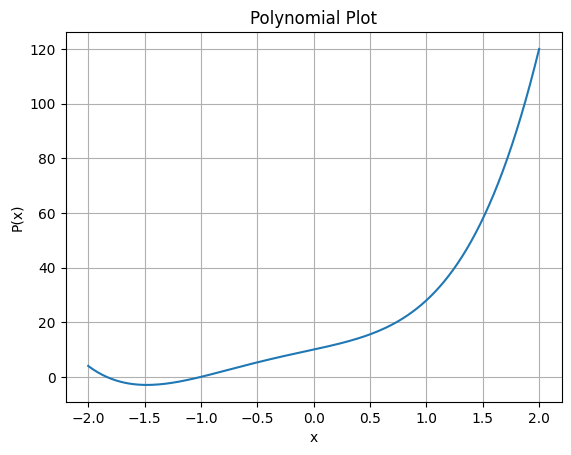

P'(2) = 169


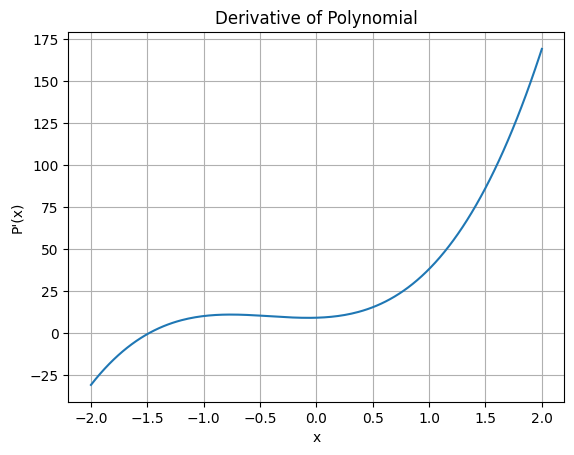

In [17]:
import matplotlib.pyplot as plt
import numpy as np

class Polynomial:
    def __init__(self, degree, coefficients):
        if degree < 0:
            raise ValueError("Degree must be a non-negative integer")

        if len(coefficients) != degree + 1:
            raise ValueError("Number of coefficients must be degree + 1")

        self.degree = degree
        self.coefficients = coefficients

    def evaluate(self, x):
        result = 0
        power = self.degree

        for coeff in self.coefficients:
            result += coeff * (x ** power)
            power -= 1

        return result

    def plot(self, x_range):
        x1, x2 = x_range
        x_values = np.linspace(x1, x2, 200)
        y_values = [self.evaluate(x) for x in x_values]
        plt.plot(x_values, y_values)
        plt.xlabel("x")
        plt.ylabel("P(x)")
        plt.title("Polynomial Plot")
        plt.grid(True)
        plt.show()

    def derivative(self, x):
        if self.degree == 0:
            return 0  # derivative of constant

        result = 0
        power = self.degree

        for coeff in self.coefficients[:-1]:  # constant term excluded
            result += power * coeff * (x ** (power - 1))
            power -= 1

        return result
    def plot_derivative(self, x_range):
        x1, x2 = x_range
        x_values = np.linspace(x1, x2, 200)
        y_values = [self.derivative(x) for x in x_values]

        plt.plot(x_values, y_values)
        plt.xlabel("x")
        plt.ylabel("P'(x)")
        plt.title("Derivative of Polynomial")
        plt.grid(True)
        plt.show()

p1 = Polynomial(4, [3, 5, 1, 9, 10])

print("P(2) =", p1.evaluate(3))
p1.plot([-2, 2])
print("P'(2) =", p1.derivative(2))
p1.plot_derivative([-2, 2])




## Problem-5

Design a system to model a simple online shopping cart. Create a class `Product` with attributes for `name` and `price`. Then, create a `ShoppingCart` class that has a list to store `Product` objects. Implement methods to `add_item(product)`, `remove_item(product_name)`, and `calculate_total()`.

In [ ]:
class Product:
    def __init__(self, name, price):
        if price < 0:
            raise ValueError("Price cannot be negative")
        self.name = name
        self.price = price

class ShoppingCart:
    def __init__(self):
        self.items = []

    def add_item(self, product):
        if not isinstance(product, Product):
            raise TypeError("Only Product objects can be added")
        self.items.append(product)

    def remove_item(self, product_name):
        for item in self.items:
            if item.name == product_name:
                self.items.remove(item)
                return

        raise ValueError("Product not found in cart")
    
    def calculate_total(self):
        total = 0
        for item in self.items:
            total += item.price
        return total
    

apple = Product("Apple", 1.50)
banana = Product("Banana", 0.80)
milk = Product("Milk", 3.20)

cart = ShoppingCart()

cart.add_item(apple)
cart.add_item(banana)
cart.add_item(milk)

print("Total:", cart.calculate_total())  # 5.50
cart.remove_item("Banana")

print("Total after removal:", cart.calculate_total())  # 4.70


     
       



Total: 5.5
Total after removal: 4.7
